In [116]:
from google.colab import drive # 패키지 불러오기 

drive.mount("/content/drive"  )    # 드라이브 기본 경로

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import pandas as pd
df_all=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_haketon/2216_1230_collected_data.csv')
#유니코드 에러: 한글조합코드로 인해 다운로드 안될때, 'euc-kr'또는 'cp949'로 인코딩 한다.

In [118]:
df_all.shape


(42, 9)

In [119]:
df_all.head()

,Unnamed: 0,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수
0,가평군,7,1.000000,0.000000,0.0,0.000000,62197,1,39
1,고양시 덕양구,48,0.656250,0.343750,0.0,0.000000,487874,6,274
2,고양시 일산동구,51,0.461538,0.461538,0.0,0.076923,296590,1,133
3,고양시 일산서구,29,0.500000,0.375000,0.0,0.125000,290738,0,140
4,과천시,3,0.500000,0.500000,0.0,0.000000,77775,1,15


In [120]:
df_all.columns

Index(['Unnamed: 0', '쏘카존수', '녹지', '주거', '공업', '상업', '인구', '대학교 개수', '아파트수'], dtype='object')

In [121]:
import pandas as pd
df_grdp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_haketon/GRDP.csv', encoding='cp949')

In [122]:
df_grdp.head()

,Unnamed: 0,GRDP
0,가평군,"2,977"
1,고양시 덕양구,"2,048"
2,고양시 일산동구,"2,048"
3,고양시 일산서구,"2,048"
4,과천시,"7,243"


In [123]:
df_grdp.shape

(42, 2)

### 데이터 합치기


In [124]:
merge_data = pd.merge(df_all, df_grdp)
merge_data.head()

,Unnamed: 0,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,GRDP
0,가평군,7,1.000000,0.000000,0.0,0.000000,62197,1,39,"2,977"
1,고양시 덕양구,48,0.656250,0.343750,0.0,0.000000,487874,6,274,"2,048"
2,고양시 일산동구,51,0.461538,0.461538,0.0,0.076923,296590,1,133,"2,048"
3,고양시 일산서구,29,0.500000,0.375000,0.0,0.125000,290738,0,140,"2,048"
4,과천시,3,0.500000,0.500000,0.0,0.000000,77775,1,15,"7,243"


### 컬럼명 변경

In [156]:
merge_data= merge_data.rename(columns={'Unnamed: 0' : '경기도시/군/구'})
merge_data.head()

,경기도시/군/구,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,GRDP
0,가평군,7,1.000000,0.000000,0.0,0.000000,62197,1,39,"2,977"
1,고양시 덕양구,48,0.656250,0.343750,0.0,0.000000,487874,6,274,"2,048"
2,고양시 일산동구,51,0.461538,0.461538,0.0,0.076923,296590,1,133,"2,048"
3,고양시 일산서구,29,0.500000,0.375000,0.0,0.125000,290738,0,140,"2,048"
4,과천시,3,0.500000,0.500000,0.0,0.000000,77775,1,15,"7,243"


In [126]:
merge_data.isnull().sum()

경기도시/군/구    0
쏘카존수        0
녹지          0
주거          0
공업          0
상업          0
인구          0
대학교 개수      0
아파트수        0
GRDP        0
dtype: int64

### 인덱스를 컬럼명으로 변경

In [148]:
df_set = merge_data.set_index('경기도시/군/구')
df_set.head()

,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,GRDP
경기도시/군/구,,,,,,,,,
가평군,7,1.000000,0.000000,0.0,0.000000,62197,1,39,"2,977"
고양시 덕양구,48,0.656250,0.343750,0.0,0.000000,487874,6,274,"2,048"
고양시 일산동구,51,0.461538,0.461538,0.0,0.076923,296590,1,133,"2,048"
고양시 일산서구,29,0.500000,0.375000,0.0,0.125000,290738,0,140,"2,048"
과천시,3,0.500000,0.500000,0.0,0.000000,77775,1,15,"7,243"


In [137]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        # !apt-get install fonts-nanum -qq  > /dev/null
        # !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [150]:
df_socar=df_set["쏘카존수"].sort_values(ascending= False)
df_socar

경기도시/군/구
성남시 분당구     58
남양주시        57
부천시         57
화성시         56
김포시         55
평택시         53
고양시 일산동구    51
고양시 덕양구     48
의정부시        37
용인시 수지구     37
용인시 기흥구     37
파주시         36
시흥시         35
수원시 영통구     34
하남시         29
용인시 처인구     29
고양시 일산서구    29
광명시         28
안산시 단원구     25
안산시 상록구     21
수원시 팔달구     20
안양시 동안구     19
안양시 만안구     19
구리시         19
수원시 장안구     18
성남시 수정구     18
수원시 권선구     16
광주시         16
오산시         15
이천시         14
성남시 중원구     13
안성시         13
양주시         12
군포시         10
포천시          9
여주시          7
가평군          7
양평군          5
의왕시          5
동두천시         4
연천군          3
과천시          3
Name: 쏘카존수, dtype: int64

In [154]:
import seaborn as sns
%matplotlib inline

In [166]:
socar_g01=merge_data.pivot_table(index="경기도시/군/구", values="쏘카존수").sort_values(by="쏘카존수", ascending=False)


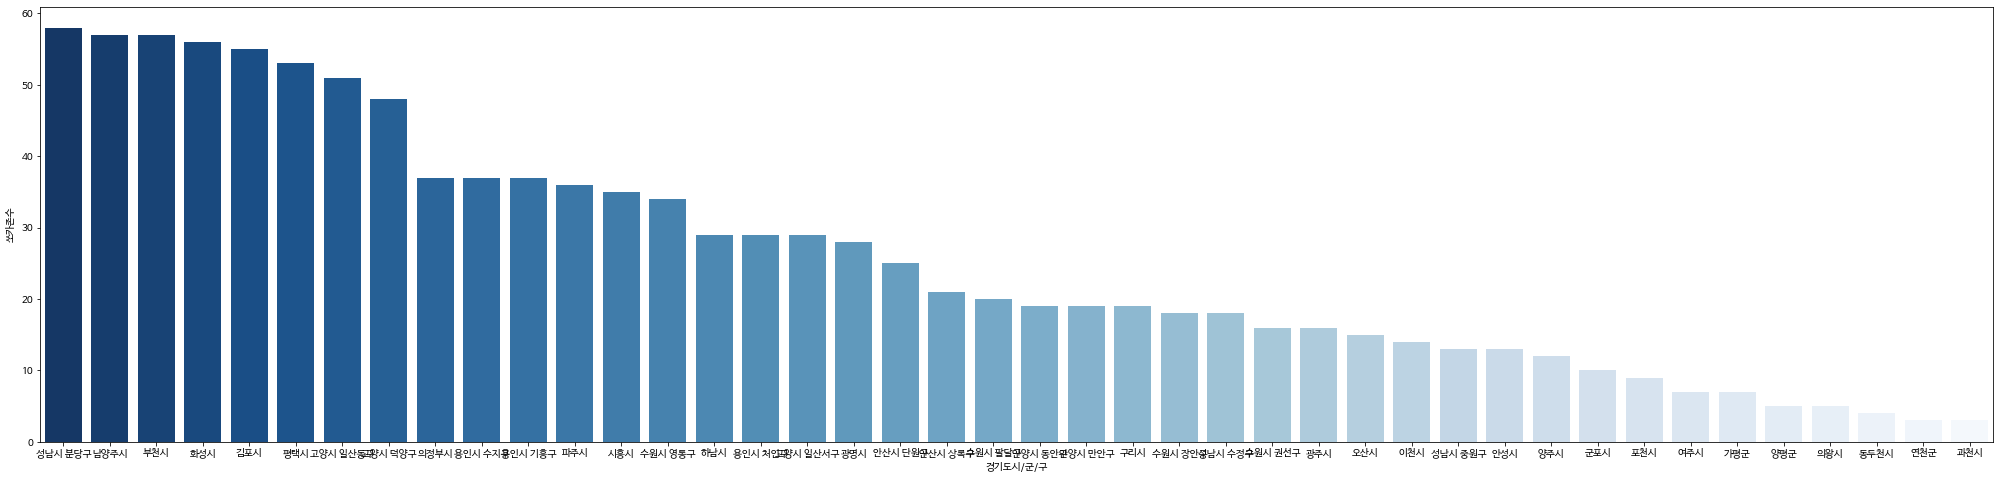

In [169]:
plt.figure(figsize=(35,8))
sns.barplot(data=socar_g01, x=socar_g01.index, y="쏘카존수", palette="Blues_r")

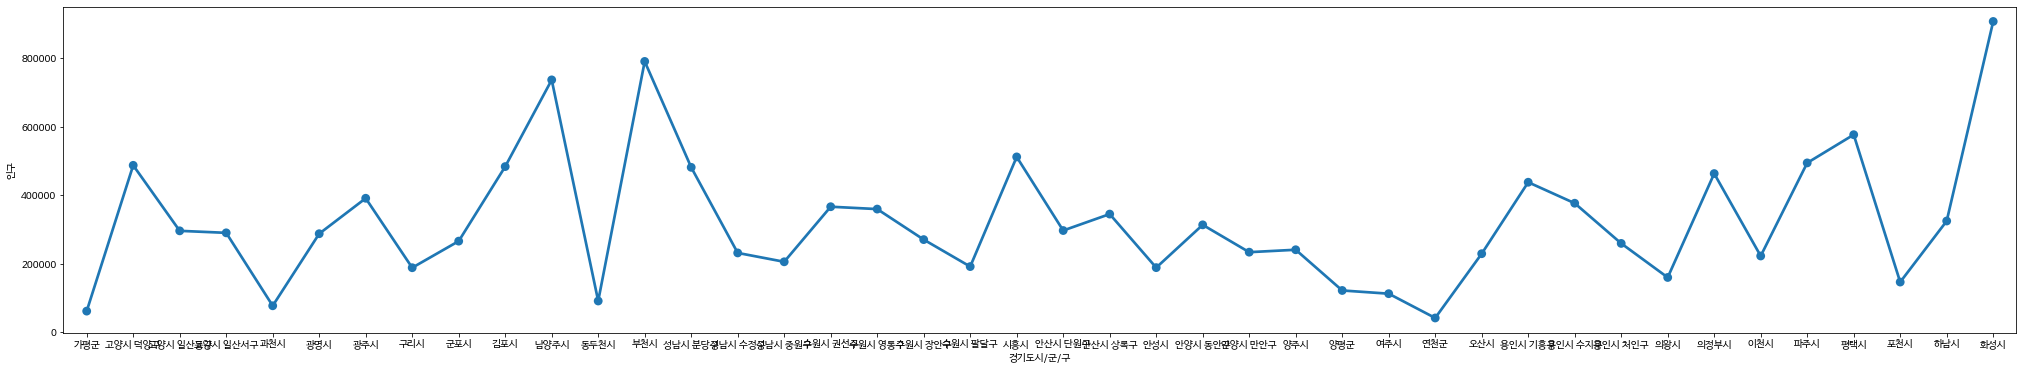

In [171]:
plt.figure(figsize=(35,6))
sns.pointplot(data=merge_data, x='경기도시/군/구', y='인구')

In [174]:
socar_g02 = pd.pivot_table(merge_data, index='경기도시/군/구', columns='쏘카존수',  values='인구')

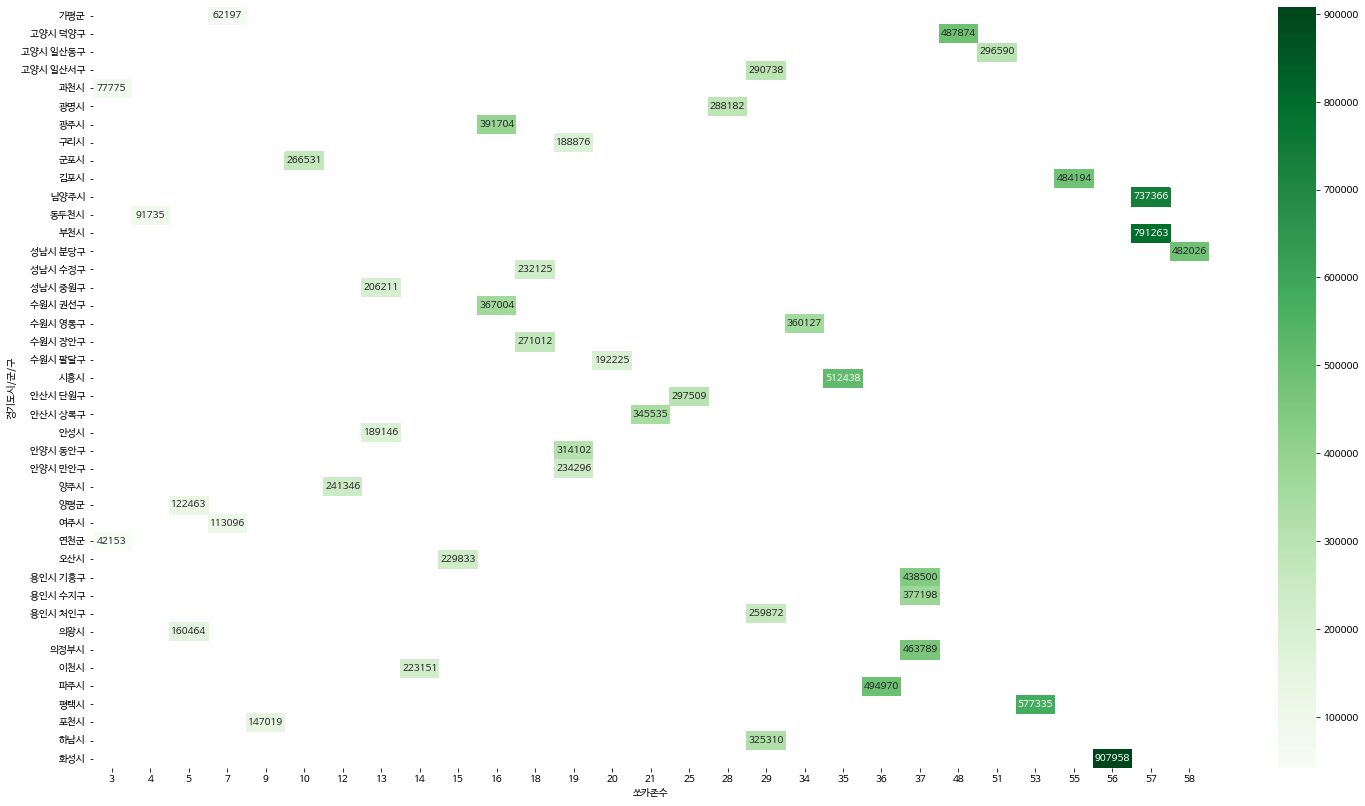

In [181]:
plt.figure(figsize=(25,14))
sns.heatmap(socar_g02, cmap="Greens", annot=True, fmt='.0f') #fmt='.0f 소숫점 없이 표기